<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의교재 : https://wikibook.co.kr/mymlrev/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits

In [3]:
mnist = load_digits()

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
digit = mnist.data[0]
for r in range(8):
    for c in range(8):
        if digit[r*8+c] != 0:
            print("■",end='')
        else:
            print('  ',end='')
    print()

    ■■■■    
    ■■■■■  
  ■■■  ■■  
  ■■    ■■  
  ■■    ■■  
  ■■  ■■■  
  ■■■■■    
    ■■■      


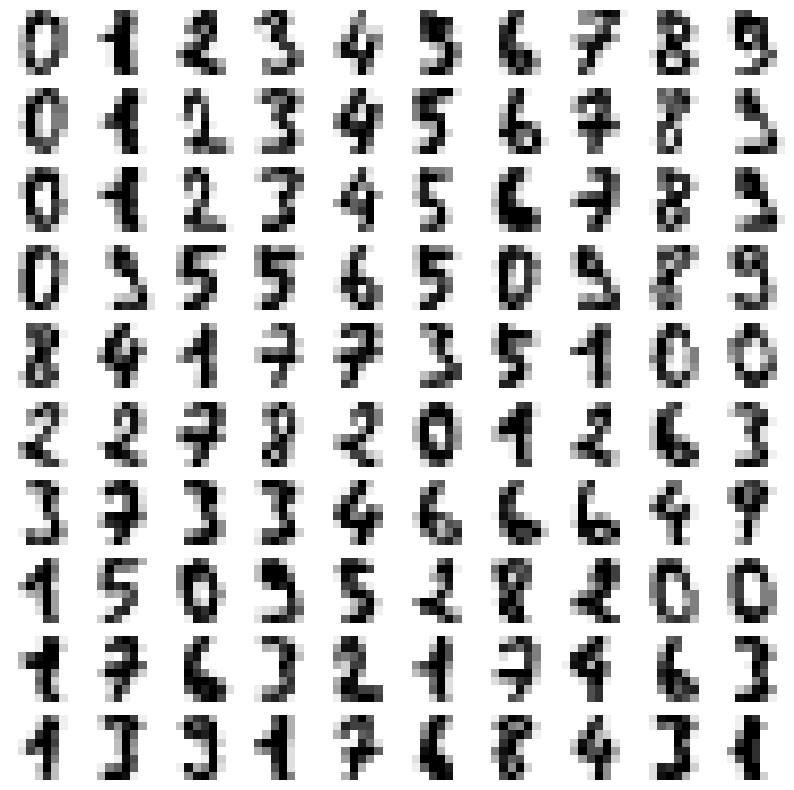

In [13]:
_,axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
    for c in range(10):
        image = mnist.data[r*10+c]
        image = image.reshape(8,8)
        axs[r][c].imshow(image,cmap='gray_r')
        axs[r][c].axis('off')
plt.show()

In [15]:
for r in range(10):
    for c in range(10):
        print(mnist.target[r*10+c],end='')
    print()

0123456789
0123456789
0123456789
0955650989
8417735100
2278201263
3733466649
1509528200
1763217463
1391768431


In [17]:
data = mnist.data
label = mnist.target

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
cv_scores = []
for model in [m1,m2]:
    cv_score = []
    for i in range(10):
        scores = cross_val_score(model,data,label,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)

In [21]:
print(cv_scores[0])
print(cv_scores[1])

[0.8246554934823092, 0.837486033519553, 0.8336033519553073, 0.8397113594040968, 0.8224518932340162, 0.8213159528243328, 0.8157914338919925, 0.8308255741775294, 0.828584729981378, 0.8280322780881442]
[0.9488019863438858, 0.9471229050279328, 0.9499193047796399, 0.9493451272501551, 0.952129112352576, 0.947135319677219, 0.9426598386095593, 0.9482464307883302, 0.9493451272501551, 0.9476939788950961]


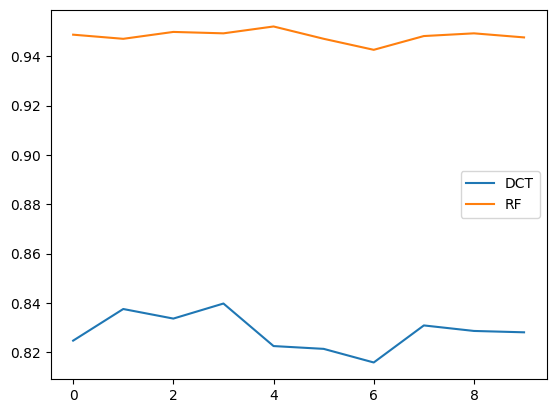

In [22]:
df = pd.DataFrame()
df['DCT'] = cv_scores[0]
df['RF'] = cv_scores[1]
df.plot()
plt.show()

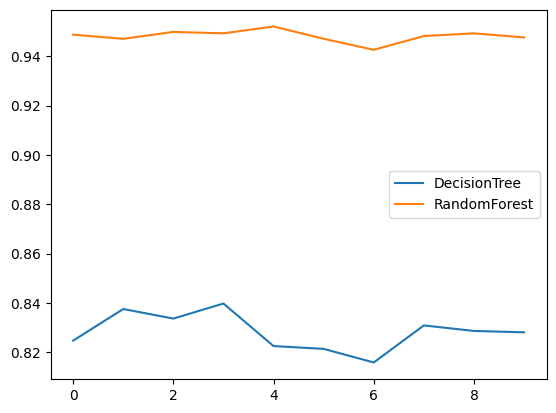

In [23]:
plt.plot(cv_scores[0],label='DecisionTree')
plt.plot(cv_scores[1],label='RandomForest')
plt.legend()
plt.show()

In [24]:
from tensorflow import keras

In [25]:
md = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
mtrain, mtest = md

In [37]:
x_train, y_train = mtrain
x_test, y_test = mtest

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

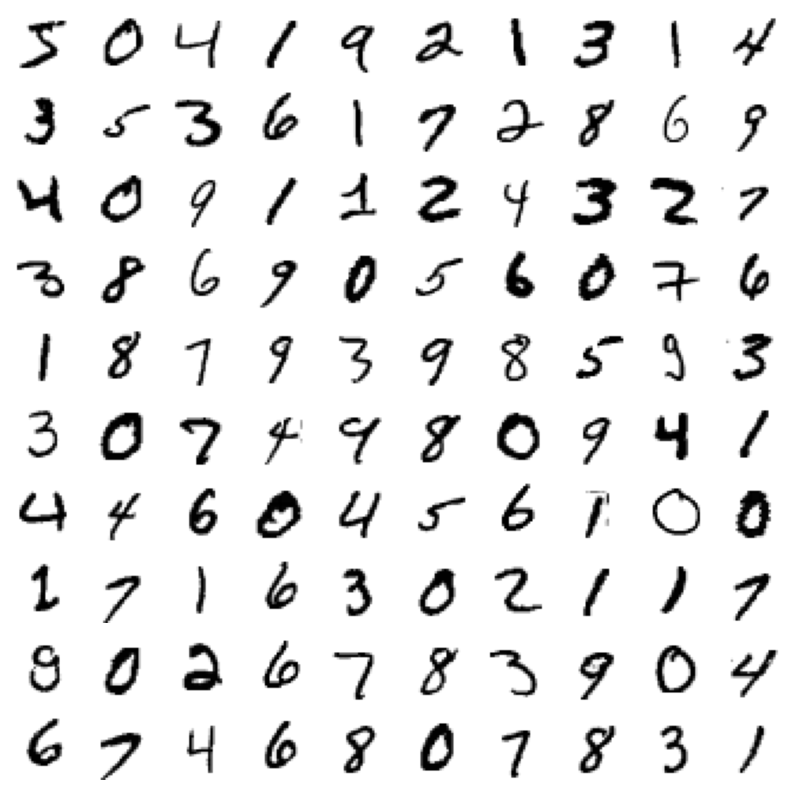

In [31]:
_,axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
    for c in range(10):
        image = x_train[r*10+c]
        axs[r][c].imshow(image,cmap='gray_r')
        axs[r][c].axis('off')
plt.show()

In [39]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [43]:
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
cv_scores = []
for model in [m1,m2]:
    cv_score = []
    for i in range(10):
        scores = cross_val_score(model,x_train[:10000],y_train[:10000],cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)

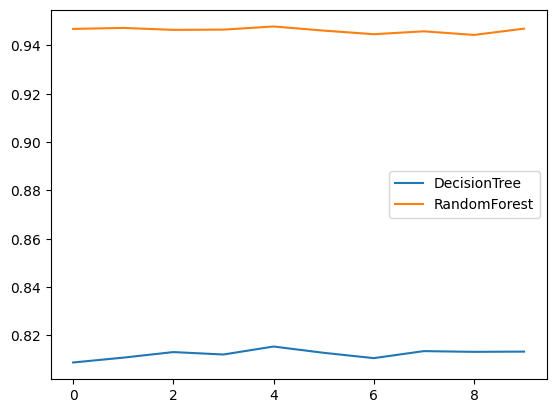

In [44]:
plt.plot(cv_scores[0],label='DecisionTree')
plt.plot(cv_scores[1],label='RandomForest')
plt.legend()
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.ensemble import VotingClassifier

In [ ]:
m1 = LogisticRegression()
m2 = SVC()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = RandomForestClassifier()
for model in [m1,m2,m3,m4,m5]:
    cv_score = []
    for i in range(10):
        scores = cross_val_score(model,data,label,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)

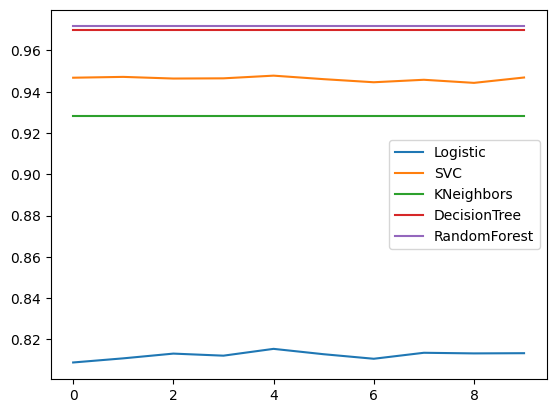

In [51]:
plt.plot(cv_scores[0],label='Logistic')
plt.plot(cv_scores[1],label='SVC')
plt.plot(cv_scores[2],label='KNeighbors')
plt.plot(cv_scores[3],label='DecisionTree')
plt.plot(cv_scores[4],label='RandomForest')
plt.legend()
plt.show()

In [ ]:
m1 = LogisticRegression()
m2 = SVC()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = RandomForestClassifier()

model = VotingClassifier(
    estimators=[('lr',m1),('svc',m2),('knn',m3),('dt',m4),('rf',m5)]
)
cv_score = []
for i in range(10):
    scores = cross_val_score(model,data,label,cv=10,scoring='accuracy')
    cv_score.append(scores.mean())
plt.plot(cv_score)
plt.show()